# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [2]:
data = pd.read_csv('dataset/data.csv')

In [3]:
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


# Create data report

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title='Data Report')

In [5]:
profile.to_file('Data_Report.html')

# EDA (Exploratory Data Analysis)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [7]:
data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [8]:
X = data['Height']
y = data['Weight']
X.head(), y.head()

(0    1.47
 1    1.50
 2    1.52
 3    1.55
 4    1.57
 Name: Height, dtype: float64,
 0    52.21
 1    53.12
 2    54.48
 3    55.84
 4    57.20
 Name: Weight, dtype: float64)

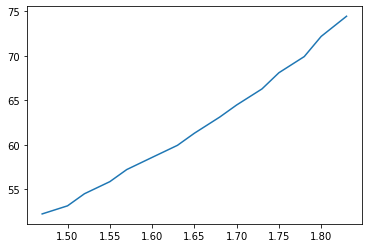

In [9]:
fig, ax = plt.subplots()
ax.plot(X, y)

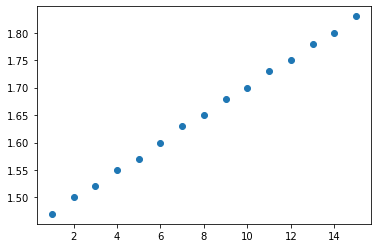

In [10]:
plt.scatter(np.arange(1, len(X) + 1), X)

# Split data into train and test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias column

In [12]:
def add_ones_column(X):
    one = pd.DataFrame(np.ones(X.index.size), columns=['one'], index=X.index)
    return pd.concat((one, X), axis=1)

# Linear Regression Hypothesis

#### Step 1: 
Calculate the Cost of the model
#### Step 2: 
Apply Gradient Descent to make the value of theta better which also depends on alpha

In [13]:
def model_train(X, y, theta, alpha):
    # Cost function
    Jx = (2/(len(X))) * ((np.matmul(np.array(X), np.array(theta)) - y))
    cost = (2/(len(X))) * (np.sum(Jx**2))
    
    # Gradient Descent
    theta = (theta - alpha*(np.matmul(np.array(X.T), np.array(Jx))))
    
    return theta, cost

# Train model

In [14]:
theta = np.random.randn(2)
X_train_with_bias = add_ones_column(X_train)
for i in range(1, 800):
    theta, cost = model_train(X_train_with_bias, y_train, theta, 0.266)
    print('==========================================')
    print('Epoch: ', i)
    print('Cost value: ', cost.mean())
    print('Theta value: ', theta)
    print('==========================================')

Epoch:  1
Cost value:  212.38095553602128
Theta value:  [32.89669584 54.7672605 ]
Epoch:  2
Cost value:  208.46178902532984
Theta value:  [0.31378844 0.94790376]
Epoch:  3
Cost value:  204.6151393338395
Theta value:  [32.40305879 54.38168571]
Epoch:  4
Cost value:  200.8396640642664
Theta value:  [0.42190761 1.55958582]
Epoch:  5
Cost value:  197.1340456711427
Theta value:  [31.91563933 54.00501068]
Epoch:  6
Cost value:  193.49699100072817
Theta value:  [0.52510861 2.16170223]
Epoch:  7
Cost value:  189.9272308394394
Theta value:  [31.43433186 53.6370649 ]
Epoch:  8
Cost value:  186.42351947063946
Theta value:  [0.62349202 2.75442433]
Epoch:  9
Cost value:  182.98463423963236
Theta value:  [30.95903274 53.27768104]
Epoch:  10
Cost value:  179.6093751267113
Theta value:  [0.71715648 3.33792035]
Epoch:  11
Cost value:  176.29656432811126
Theta value:  [30.48964017 52.92669489]
Epoch:  12
Cost value:  173.04504584471889
Theta value:  [0.80619882 3.91235539]
Epoch:  13
Cost value:  169.85

Epoch:  147
Cost value:  14.34433953162539
Theta value:  [ 8.28907231 42.13337564]
Epoch:  148
Cost value:  14.086837504037366
Theta value:  [-0.09015115 28.40788375]
Epoch:  149
Cost value:  13.834077864607682
Theta value:  [ 8.06094893 42.09629649]
Epoch:  150
Cost value:  13.585972896885472
Theta value:  [-0.16429906 28.62560367]
Epoch:  151
Cost value:  13.342436508079452
Theta value:  [ 7.83474706 42.06129176]
Epoch:  152
Cost value:  13.103384198999466
Theta value:  [-0.23937231 28.84067857]
Epoch:  153
Cost value:  12.868733034554513
Theta value:  [ 7.61043864 42.02831851]
Epoch:  154
Cost value:  12.63840161479685
Theta value:  [-0.31534626 29.05315289]
Epoch:  155
Cost value:  12.41231004650225
Theta value:  [ 7.38799609 41.99733463]
Epoch:  156
Cost value:  12.190379915276438
Theta value:  [-0.39219677 29.26307028]
Epoch:  157
Cost value:  11.972534258177852
Theta value:  [ 7.16739231 41.96829879]
Epoch:  158
Cost value:  11.758697536847212
Theta value:  [-0.46990019 29.47047

Epoch:  259
Cost value:  2.074800499602467
Theta value:  [-2.15284912 42.3094276 ]
Epoch:  260
Cost value:  2.0421153209967056
Theta value:  [-5.13182099 37.51127718]
Epoch:  261
Cost value:  2.010018027247471
Theta value:  [-2.30565466 42.34023942]
Epoch:  262
Cost value:  1.9784977907983738
Theta value:  [-5.23043524 37.63149723]
Epoch:  263
Cost value:  1.9475439843641067
Theta value:  [-2.45754848 42.37163685]
Epoch:  264
Cost value:  1.9171461772233758
Theta value:  [-5.32913789 37.75064576]
Epoch:  265
Cost value:  1.8872941315804153
Theta value:  [-2.60854119 42.4036053 ]
Epoch:  266
Cost value:  1.8579777989939015
Theta value:  [-5.42792107 37.86873885]
Epoch:  267
Cost value:  1.8291873168719683
Theta value:  [-2.75864326 42.43613042]
Epoch:  268
Cost value:  1.8009130050320952
Theta value:  [-5.52677706 37.9857923 ]
Epoch:  269
Cost value:  1.773145362324684
Theta value:  [-2.90786495 42.46919817]
Epoch:  270
Cost value:  1.7458750633191695
Theta value:  [-5.62569833 38.10182

Epoch:  388
Cost value:  0.4042155493807884
Theta value:  [-11.37861698  43.56734074]
Epoch:  389
Cost value:  0.4006418962283417
Theta value:  [-10.5559072   45.04695999]
Epoch:  390
Cost value:  0.39712309765978904
Theta value:  [-11.47231266  43.6422116 ]
Epoch:  391
Cost value:  0.3936581749840561
Theta value:  [-10.66561119  45.09490683]
Epoch:  392
Cost value:  0.3902461675087874
Theta value:  [-11.56582688  43.71663289]
Epoch:  393
Cost value:  0.3868861322075239
Theta value:  [-10.77483483  45.14290101]
Epoch:  394
Cost value:  0.3835771433930366
Theta value:  [-11.65915795  43.79060987]
Epoch:  395
Cost value:  0.3803182923967104
Theta value:  [-10.88358194  45.19093862]
Epoch:  396
Cost value:  0.3771086872538557
Theta value:  [-11.7523042   43.86414772]
Epoch:  397
Cost value:  0.37394745239485716
Theta value:  [-10.99185633  45.23901581]
Epoch:  398
Cost value:  0.37083372834202455
Theta value:  [-11.84526403  43.93725155]
Epoch:  399
Cost value:  0.3677666714120671
Theta v

Epoch:  501
Cost value:  0.19958349515981566
Theta value:  [-16.04909529  47.72132137]
Epoch:  502
Cost value:  0.19872814166223518
Theta value:  [-16.39542163  47.24278156]
Epoch:  503
Cost value:  0.19788080595123775
Theta value:  [-16.13659151  47.76768775]
Epoch:  504
Cost value:  0.19704136507194803
Theta value:  [-16.4771525   47.29839701]
Epoch:  505
Cost value:  0.19620969826273815
Theta value:  [-16.22375942  47.81397451]
Epoch:  506
Cost value:  0.19538568691489802
Theta value:  [-16.55865968  47.35376034]
Epoch:  507
Cost value:  0.1945692145330469
Theta value:  [-16.3106009  47.8601806]
Epoch:  508
Cost value:  0.19376016669627788
Theta value:  [-16.63994313  47.40887369]
Epoch:  509
Cost value:  0.19295843102001778
Theta value:  [-16.39711778  47.90630496]
Epoch:  510
Cost value:  0.19216389711860085
Theta value:  [-16.72100279  47.46373915]
Epoch:  511
Cost value:  0.19137645656852034
Theta value:  [-16.4833119   47.95234659]
Epoch:  512
Cost value:  0.19059600287237605
T

Theta value:  [-20.70234747  50.29651686]
Epoch:  620
Cost value:  0.13244886172408937
Theta value:  [-20.83821694  50.15021543]
Epoch:  621
Cost value:  0.13206425164917773
Theta value:  [-20.77312101  50.33706969]
Epoch:  622
Cost value:  0.13168146107070625
Theta value:  [-20.90700815  50.19379822]
Epoch:  623
Cost value:  0.13130047358166547
Theta value:  [-20.84364956  50.37751409]
Epoch:  624
Cost value:  0.13092127302247875
Theta value:  [-20.97558932  50.23721543]
Epoch:  625
Cost value:  0.13054384347660258
Theta value:  [-20.91393417  50.41784997]
Epoch:  626
Cost value:  0.13016816926621408
Theta value:  [-21.04396088  50.28046804]
Epoch:  627
Cost value:  0.1297942349479715
Theta value:  [-20.9839759   50.45807725]
Epoch:  628
Cost value:  0.1294220253088549
Theta value:  [-21.11212325  50.32355701]
Epoch:  629
Cost value:  0.12905152536208436
Theta value:  [-21.0537758   50.49819586]
Epoch:  630
Cost value:  0.1286827203431098
Theta value:  [-21.18007687  50.3664833 ]
Epoc

Epoch:  742
Cost value:  0.09562197063186934
Theta value:  [-24.66661581  52.53593209]
Epoch:  743
Cost value:  0.0953848344430955
Theta value:  [-24.66322444  52.60620759]
Epoch:  744
Cost value:  0.09514852907478913
Theta value:  [-24.72344974  52.57087464]
Epoch:  745
Cost value:  0.09491305074715473
Theta value:  [-24.72055725  52.64011206]
Epoch:  746
Cost value:  0.09467839571256066
Theta value:  [-24.78010296  52.60569577]
Epoch:  747
Cost value:  0.09444456025506315
Theta value:  [-24.7776987   52.67391348]
Epoch:  748
Cost value:  0.09421154068994766
Theta value:  [-24.83657598  52.64039601]
Epoch:  749
Cost value:  0.09397933336326843
Theta value:  [-24.83464948  52.70761203]
Epoch:  750
Cost value:  0.09374793465140382
Theta value:  [-24.8928693   52.67497591]
Epoch:  751
Cost value:  0.09351734096061538
Theta value:  [-24.89141031  52.74120793]
Epoch:  752
Cost value:  0.09328754872661729
Theta value:  [-24.94898342  52.70943598]
Epoch:  753
Cost value:  0.09305855441414836

# Value of theta for which we are training the model

In [15]:
theta

array([-26.19844771,  53.51726043])

# Predict from the model

In [16]:
def predict(X, theta):
    X = add_ones_column(X)
    pred = np.matmul(np.array(X), np.array(theta))
    return pred

In [17]:
y_pred = predict(X_test, theta)

# Plot between actual and predicted value

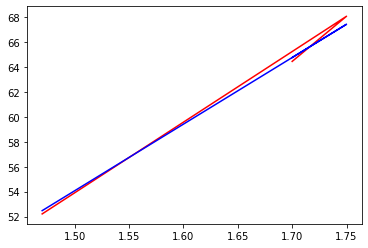

In [18]:
plt.plot(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='b')
plt.show()

# Root mean square error

In [19]:
def rms_error(true, predict):
    rms = np.sqrt((1/2*len(y_test)) * (sum((np.array(y_test) - np.array(y_pred))**2)))
    return rms

In [20]:
rms = rms_error(y_test, y_pred)
rms

0.9319501303659697